<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/mnist_keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.datasets.mnist import load_data
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [ ]:
(xtrain, ytrain), (xtest, ytest) = load_data()
xtrain = xtrain.astype('float32') /255.
xtest = xtest.astype('float32') /255.
ytrain=to_categorical(ytrain)
ytest =to_categorical(ytest)

xtrain = xtrain.reshape(60000,28*28)
xtest = xtest.reshape(10000, 28*28)

11501568/11490434 [==============================] - 0s 0us/step


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


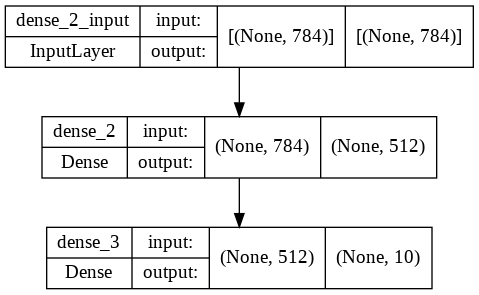

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28, )))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='mnist_keras.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(xtrain, ytrain, epochs=10, batch_size=128)
test_loss, test_accu = model.evaluate(xtest, ytest)
print(test_loss, test_accu)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2591 - accuracy: 0.9243
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1048 - accuracy: 0.9687
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0685 - accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0501 - accuracy: 0.9848
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0381 - accuracy: 0.9883
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0285 - accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0229 - accuracy: 0.9934
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0169 - accuracy: 0.9951
Epoch 9/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0135 - accuracy: 0.9962
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0635 - accurac

Precision score: 0.9832970555072029
Recall score   : 0.9830620546761197
Confusion Matrix
[[ 970    0    1    1    2    0    3    1    2    0]
 [   0 1126    2    2    0    1    2    1    1    0]
 [   2    1 1020    0    1    0    1    4    3    0]
 [   0    0    3  993    0    2    0    5    2    5]
 [   0    0    3    1  967    0    3    2    0    6]
 [   1    0    0   10    1  871    3    0    5    1]
 [   3    3    1    1    4    3  942    0    1    0]
 [   0    2    7    0    1    0    0 1013    2    3]
 [   4    1    6    4    3    4    2    3  942    5]
 [   2    2    0    5    2    2    0    7    0  989]]


<Figure size 432x288 with 0 Axes>

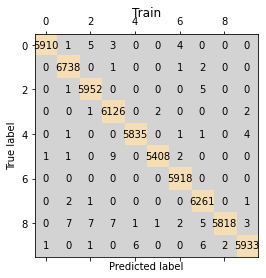

<Figure size 432x288 with 0 Axes>

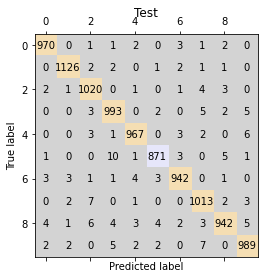

In [ ]:
ypred = model.predict(xtest)

predicted_labels = np.argmax(ypred, axis=-1)
actual_labels = np.argmax(ytest, axis=-1)

print('Precision score:', precision_score(actual_labels, predicted_labels, average='macro'))
print('Recall score   :', recall_score(actual_labels, predicted_labels, average='macro'))


print('Confusion Matrix')
print(confusion_matrix(ytest.argmax(1), ypred.argmax(1)))

cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])

#confusion matrix
def cm(ytest, ypred, title):
  cm = confusion_matrix(ytest, ypred)

  plt.figure()
  plt.matshow(cm, cmap=cmap)
  
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

cm(ytrain.argmax(1), model.predict(xtrain).argmax(1), title='Train')
cm(ytest.argmax(1), model.predict(xtest).argmax(1), title='Test')

In [1]:
# plot intermediate outputs
# display output from the hidden layer
temp_model =  Model(inputs=model.input, outputs=model.get_layer('dense_2').output)
hidden_layer_output = temp_model.predict(xtest[0:10,])  # size is 512 = 32*16
output_layer_output = model.predict(xtest[0:10,])        # size is 10
print(temp_output.shape)
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  # plot original digits
  plt.subplot(3,n,i+1)
  plt.imshow(xtrain[i].reshape(28,28))
  plt.gray()

  # plot hidden layer outputs
  plt.subplot(3,n,i+1+n)
  plt.imshow(hidden_layer_output[i].reshape(32,16))
  plt.gray()

  # plot outputs 
  plt.subplot(3,n,i+1+2*n)
  plt.imshow(output_layer_output[i].reshape(10,1))
  plt.gray()

plt.show()

NameError: ignored